In [90]:
#!pip install nbimporter
import nbimporter
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from tqdm import tqdm

%run Fonctions_projet.ipynb

#Download data

#maybe better to export data from introduction before

#df of log returns
df_60m=pd.read_parquet("data/clean/60m/data_clean_60m_log_ret.parquet")



In [43]:
def plot_close(df, x, y, hue=None, title='Ticker', x_label=None, y_label=None, save_name=None):
    ax = sns.lineplot(data=df, x=x, y=y, hue=hue)
    ax.set_title(title)
    plt.xticks(rotation=45)
    
    if x_label:
        ax.set_xlabel(x_label)
        
    if y_label:
        ax.set_ylabel(y_label)
    
    if save_name:
        if not os.path.exists('plots'):
            os.mkdir('plots')
        plt.savefig(f"plots/{save_name}.svg", bbox_inches = "tight")
    plt.show()

In [16]:
df_60m

,SBUX,ISRG,KIM,QCOM,GL,WFC,CRM,STT,WMT,AON,...,UAA,EFX,HII,APD,O,DPZ,ETN,CNC,TFC,GE
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-29 11:30:00-05:00,-0.005794,0.001470,0.000000,0.000227,0.000283,-0.000420,0.003335,-0.004240,-0.001795,-0.000299,...,-0.009843,-0.000065,-0.023320,-0.000717,0.001400,0.004457,-0.001955,-0.002971,-0.001282,-0.002705
2020-01-29 12:30:00-05:00,0.002553,0.001814,0.000000,0.003228,0.001791,0.001153,0.000818,-0.002826,0.000684,0.000184,...,-0.003303,0.000967,0.004322,0.002615,-0.001253,0.000194,-0.000103,0.000381,-0.002650,-0.001162
2020-01-29 13:30:00-05:00,0.009173,0.000075,-0.003466,-0.001075,0.000000,-0.000419,0.001580,0.001755,-0.001940,0.000735,...,0.000000,0.002446,0.001890,-0.001159,-0.001867,0.001695,0.000772,0.003502,-0.008452,0.002322
2020-01-29 14:30:00-05:00,0.001882,-0.003881,-0.001986,-0.000057,-0.002357,-0.005783,-0.004694,-0.007300,-0.001858,-0.002344,...,-0.003551,-0.004704,-0.000491,0.000970,-0.000893,0.000245,-0.000103,-0.005181,-0.004902,-0.002710
2020-01-29 15:30:00-05:00,-0.005391,-0.005675,-0.002987,-0.001189,0.000189,-0.003063,-0.005651,-0.002555,-0.005050,-0.003411,...,-0.004039,-0.002781,-0.001399,-0.000295,-0.002301,-0.002449,-0.002423,-0.003980,-0.001299,0.003096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-26 14:30:00-05:00,-0.025384,-0.031611,-0.026317,-0.034022,-0.014465,-0.013396,-0.024054,-0.026997,-0.011085,-0.017708,...,-0.030747,-0.034664,-0.018608,-0.017182,-0.023925,-0.020746,-0.017236,-0.025104,-0.022172,-0.023210
2022-01-26 15:30:00-05:00,0.004773,0.001364,0.000833,0.001832,0.000390,0.008705,-0.004510,0.007985,0.001549,0.003709,...,0.000000,0.009939,0.003452,0.001742,0.000442,-0.008430,0.001013,0.006801,0.013776,0.007311
2022-01-27 09:30:00-05:00,0.004802,0.007827,0.003325,-0.004561,0.004908,0.008264,0.040331,0.010234,0.016810,-0.002134,...,0.015083,0.002381,0.003067,0.008056,0.010111,0.005730,0.007627,0.016213,0.006027,0.012363


In [91]:
#Rolling clustering for 60m dataset


#Cluster tickers

#Compute T=3*N
N=df_60m.shape[1]
T=3*N

#Number of windows possible
lag_max=df_60m.shape[0]-T
liste=RolledCluster(df_60m,T,"louvain_cluster/asset",False,False,lag_max)

In [92]:
liste_cluster=dask.compute(dask.compute(liste))[0][0]
liste_cluster

KeyboardInterrupt: 

In [71]:
number_of_clusters=[]
for element in liste_cluster:
    number_of_clusters.append(element["Cluster"].unique().max()+1)

#Create dataframe for plotting reasons
df_plot_clusters= pd.DataFrame(number_of_clusters)
df_plot_clusters["Datetime"]=df_60m[df_60m.index>"2020-12-04 11:30:00-05:00"].index
df_plot_clusters.rename(columns={0: "Clusters", "Datetime": "Datetime"},inplace=True)
df_plot_clusters

,Clusters,Datetime
0,503,2020-12-04 12:30:00-05:00
1,503,2020-12-04 13:30:00-05:00
2,503,2020-12-04 14:30:00-05:00
3,503,2020-12-04 15:30:00-05:00
4,503,2020-12-07 09:30:00-05:00
...,...,...
2005,3,2022-01-26 14:30:00-05:00
2006,3,2022-01-26 15:30:00-05:00
2007,3,2022-01-27 09:30:00-05:00
2008,3,2022-01-27 10:30:00-05:00


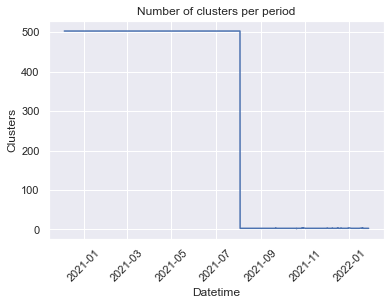

In [72]:
plot_close(df_plot_clusters, x="Datetime", y="Clusters", hue=None, title='Number of clusters per period', x_label=None, y_label=None, save_name=None)


In [65]:
#Get position of drop

cut=0
while number_of_clusters[cut]>10:
    cut=cut+1

cut

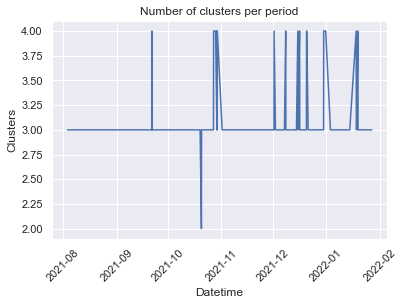

In [73]:
plot_close(df_plot_clusters[cut:], x="Datetime", y="Clusters", hue=None, title='Number of clusters per period', x_label=None, y_label=None, save_name=None)


In [93]:
#Add column for ARI measure

ARI= RolledARI(liste_cluster)
ARI
ARI.insert(0,1)
df_plot_clusters["ARI"]=ARI

df_plot_clusters

100%|██████████| 2009/2009 [00:02<00:00, 701.78it/s]


,Clusters,Datetime,ARI
0,503,2020-12-04 12:30:00-05:00,1.000000
1,503,2020-12-04 13:30:00-05:00,1.000000
2,503,2020-12-04 14:30:00-05:00,1.000000
3,503,2020-12-04 15:30:00-05:00,1.000000
4,503,2020-12-07 09:30:00-05:00,1.000000
...,...,...,...
2005,3,2022-01-26 14:30:00-05:00,0.977469
2006,3,2022-01-26 15:30:00-05:00,0.981822
2007,3,2022-01-27 09:30:00-05:00,0.977019
2008,3,2022-01-27 10:30:00-05:00,0.982472


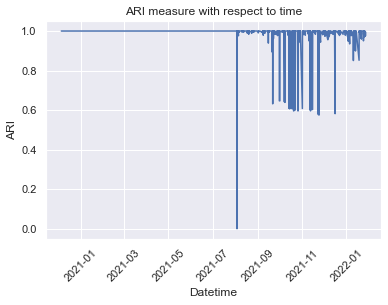

In [86]:
plot_close(df_plot_clusters, x="Datetime", y="ARI", hue=None, title='ARI measure with respect to time', x_label=None, y_label=None, save_name=None)



In [89]:


for i in tqdm(range(cut+1,len(liste_cluster)-1)):
    if len(liste_cluster[i].value_counts())==len(liste_cluster[i+1].value_counts()):
        liste_cluster[i+1]=keep_cluster_number(liste_cluster[i],liste_cluster[i+1])

100%|██████████| 858/858 [00:22<00:00, 38.59it/s]
